In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread("data.jpg",0)

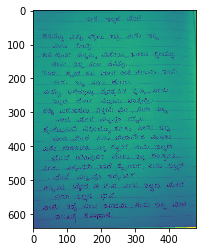

In [4]:
plt.imshow(img)

In [5]:
img.shape

(640, 480)

In [6]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [7]:
kernel = np.ones((5, 100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

In [8]:
im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [9]:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[1])
sorted_ctrs = sorted_ctrs[0:]


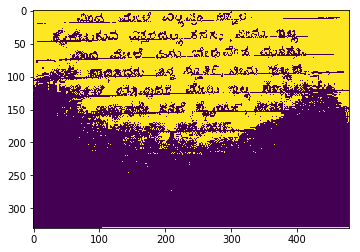

In [10]:
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    if ((w*h) < 5000):
        continue
    roi = thresh2[y:y+h, x:x+w]
    plt.imshow(roi)

In [9]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)

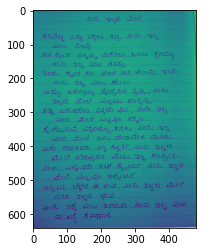

In [10]:
plt.imshow(blurred)

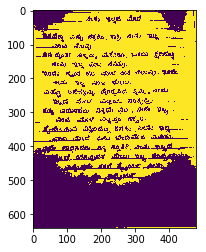

In [14]:
ret,thresh1 = cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

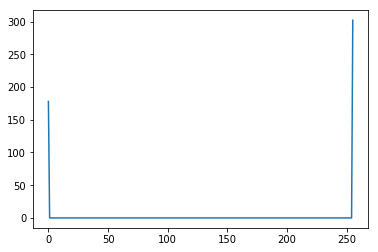

In [19]:
histr = cv2.calcHist([thresh1[10]],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

In [41]:
print(thresh1[0].shape)
np.unique(thresh1[:,0],return_counts=True)[1][0]

(480,)


265

In [47]:
plt.plot(thresh1[:,630])

IndexError: index 630 is out of bounds for axis 1 with size 480

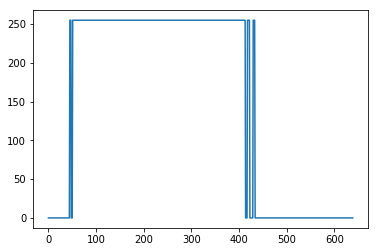

In [36]:
plt.plot(thresh1[:,0])

In [51]:
l=[]
for i in range(img.shape[0]):
    white=np.unique(thresh1[i],return_counts=True)[1][0]
    l.append(white)
print(l)
print(len(l))

[205, 206, 214, 226, 264, 260, 215, 254, 241, 192, 178, 180, 172, 172, 172, 180, 174, 176, 181, 183, 184, 199, 220, 222, 216, 224, 228, 225, 262, 293, 282, 242, 234, 211, 165, 151, 152, 142, 120, 110, 105, 106, 108, 97, 92, 81, 80, 82, 83, 80, 82, 79, 76, 79, 101, 130, 109, 115, 129, 126, 50, 40, 27, 23, 26, 20, 2, 8, 17, 36, 55, 87, 105, 124, 142, 146, 145, 146, 151, 159, 188, 216, 204, 192, 176, 92, 25, 26, 28, 27, 22, 16, 6, 4, 3, 480, 480, 4, 5, 11, 18, 31, 39, 46, 42, 42, 47, 82, 102, 110, 126, 75, 27, 8, 7, 8, 5, 1, 1, 2, 6, 10, 18, 28, 58, 83, 121, 148, 158, 155, 145, 145, 174, 185, 196, 172, 161, 140, 81, 44, 38, 33, 26, 17, 8, 3, 2, 480, 480, 480, 480, 8, 17, 21, 42, 65, 84, 79, 72, 71, 98, 103, 105, 111, 89, 31, 13, 18, 14, 7, 4, 2, 4, 5, 7, 24, 39, 45, 58, 80, 108, 143, 161, 174, 159, 146, 160, 174, 135, 133, 140, 131, 65, 10, 9, 11, 11, 5, 480, 480, 480, 480, 480, 480, 3, 5, 8, 25, 47, 68, 73, 75, 74, 86, 105, 106, 102, 79, 44, 13, 7, 7, 9, 7, 4, 1, 480, 480, 1, 3, 9, 31, 5

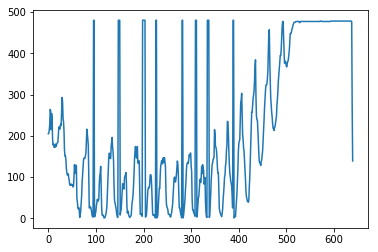

In [52]:
plt.plot(l)
plt.show()

In [54]:
wlist=[]
for i in range(len(l)):
    if l[i]>440:
        wlist.append(i)

In [55]:
wlist

[95,
 96,
 147,
 148,
 149,
 150,
 198,
 199,
 200,
 201,
 202,
 203,
 226,
 227,
 281,
 282,
 309,
 310,
 311,
 334,
 335,
 336,
 337,
 388,
 389,
 463,
 464,
 491,
 492,
 493,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637]

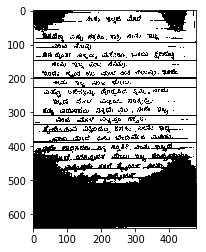

In [65]:
temp=thresh1.copy()
for i in wlist:
    temp[i]=0
plt.imshow(temp,cmap='gray'
          )

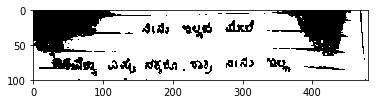

In [70]:
plt.imshow(thresh1[0:100],cmap='gray')

In [83]:
for i in range(img.shape[0]):
    if np.any(temp[i])==0:
        print(i)

95
96
147
148
149
150
198
199
200
201
202
203
226
227
281
282
309
310
311
334
335
336
337
388
389
463
464
491
492
493
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637


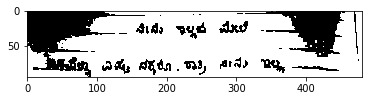

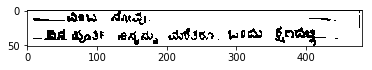

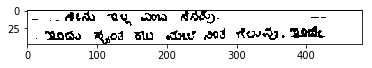

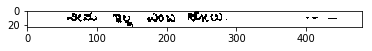

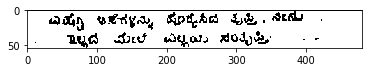

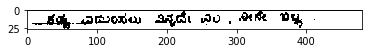

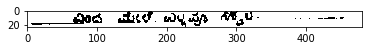

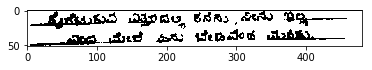

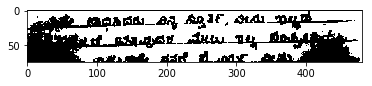

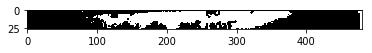

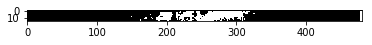

In [84]:
start=0
for i in range(temp.shape[0]):
    if temp[i].any()==0:
        if i-start>10:
            plt.imshow(temp[start:i],cmap='gray')
            plt.show()
        start=i

        